In [1]:
###### AT THE START OF EVERY PROJECT  #####
### you must do this: https://blog.inedo.com/python/python-environment-management-best-practices/

## create a folder for your project, eg scanpy-tutorial
## in it, make sure you have your sub-directories needed... eg: data - where you have raw data, write: where you have output files saved; and jupyter notebook
## most importantly... have a requirements.txt file where you specify all the libraries/pacakages/dependencies required, and the exact version you need. 
# in this case we have: wheel (it's something to help easily manage and install python modules and libraries), jupyter, and scanpy[leiden]==1.9.3



#### once you have opened up your folder on VScode (or check that you have cd-ed to the correct wd on terminal),
### ON THE TERMINAL: 
## IF this is the first time you are starting this project, you need to create environment and then activate it. 
# python -m venv env     #this is to create the env using venv
# source env/bin/activate     # this is to activate the env... if you have created the project and therefore, env only run this nexct time..


# NOW you should see that your "user" on terminal has changed from "base" to "env"

## then install all your dependencies: 
# pip install -r requirements.txt


############# IF YOU ARE REOPENING PROJECT THE NTH TIME ##############################

####### once you have done this once.... the next time you open up your project to work on it again... you only need to: 
# on terminal : source env/bin/activate 
# it should automatically have all the dependencies you need etc. 




In [2]:
############## Scanpy tutorial #################
## kernel used: /usr/local/anaconda/bin/python 
# this is: python 3.10.9
# still haven't figured out how to make sure this is specified in the environment... 

In [3]:
### load libraries
import numpy as np
import pandas as pd
import scanpy as sc

In [4]:
### set settings of your scanpy
sc.settings.verbosity = 3   #verbosity: errors(0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor= "white")

### scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.6 pynndescent==0.5.10

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.6 pynndescent==0.5.10


In [5]:
results_file = "write/pbmc3k.h5ad"   #file that will store analysis results

In [6]:
# if you need your working directory
import os
os.getcwd()

'/Users/uqssoon/Documents/Python2/scanpy-tutorial-main'

In [7]:
### now read in count matrix into an AnnData object, which holds many slots for annotations and different representations of the data/ It also comes with its own HDF5-based file format: .h5ad
# to understand more about adata: https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html
adata = sc.read_10x_mtx(
    '/Users/uqssoon/Documents/Python2/scanpy-tutorial-main/data/filtered_gene_bc_matrices/hg19/',
    var_names = 'gene_symbols',
    cache = True)

... reading from cache file cache/Users-uqssoon-Documents-Python2-scanpy-tutorial-main-data-filtered_gene_bc_matrices-hg19-matrix.h5ad


In [8]:
# to see what is in your "object"
adata    #index/rows = 2700, columns = 32738 (cell x genes)

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


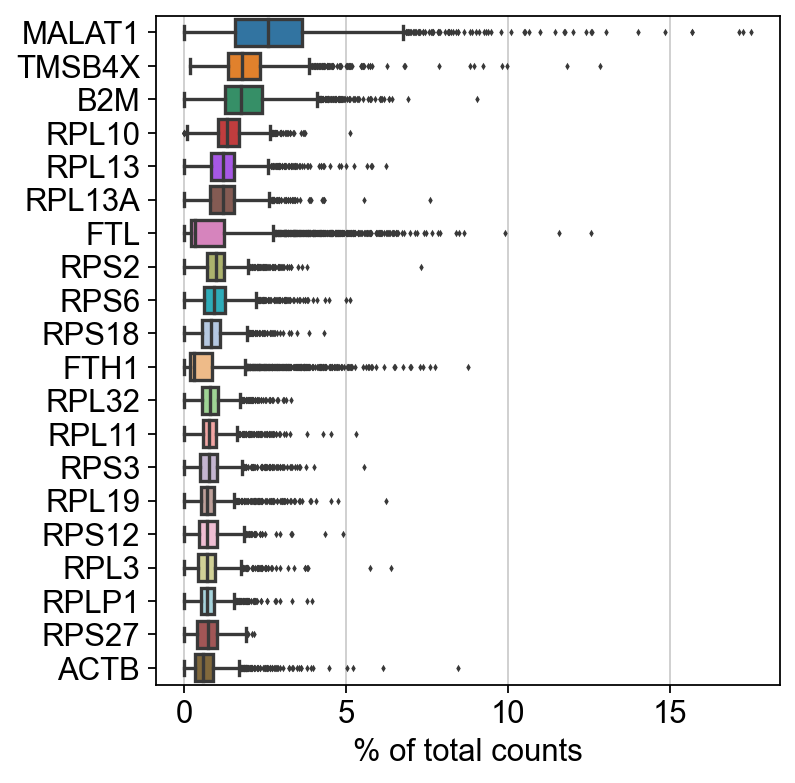

In [9]:
################## PREPROCESSING ##################

## first show genes which take up the highest fraction of counts in each cell, across all cells
# help(sc.pl.highest_expr_genes)     ### this is how you get help on python!!
sc.pl.highest_expr_genes(adata, n_top =20, )

In [10]:
### basic filtering
#help(sc.pp.filter_cells)
#help(sc.pp.filter_genes)

sc.pp.filter_cells(adata, min_genes=200)   ### can only provide ONE optional parameters eg min_counts or min_genes per call. 
sc.pp.filter_genes(adata, min_cells=3)

adata   #now there are only 13714 genes left... 

filtered out 19024 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [12]:
### now let's get mito content

adata.var['mt'] =adata.var_names.str.startswith('MT-') #anotate group of mito genes as 'mt'
#help(sc.pp.calculate_qc_metrics)
sc.pp.calculate_qc_metrics(adata, qc_vars = ['mt'], percent_top=None, log1p=False, inplace=True)   
###log1p - transform data into natural log(default), inplace = place it into .obs or .var

adata


AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [13]:
### looking at our metadata
adata.obs   #- observational level
adata.var   # variable level


gene_ids  n_cells     mt  n_cells_by_counts  \
AL627309.1     ENSG00000237683        9  False                  9   
AP006222.2     ENSG00000228463        3  False                  3   
RP11-206L10.2  ENSG00000228327        5  False                  5   
RP11-206L10.9  ENSG00000237491        3  False                  3   
LINC00115      ENSG00000225880       18  False                 18   
...                        ...      ...    ...                ...   
AC145212.1     ENSG00000215750       16  False                 16   
AL592183.1     ENSG00000220023      323  False                323   
AL354822.1     ENSG00000215615        8  False                  8   
PNRC2-1        ENSG00000215700      110  False                110   
SRSF10-1       ENSG00000215699       69  False                 69   

               mean_counts  pct_dropout_by_counts  total_counts  
AL627309.1        0.003333              99.666667           9.0  
AP006222.2        0.001111              99.888889           3.0  
RP11-206L10.2     0.001852              99.814815           5.0  
RP11-206L10.9     0.001111              99.888889           3.0  
LINC00115         0.006667              99.333333          18.0  
...                    ...                    ...           ...  
AC145212.1        0.006667              99.407407          18.0  
AL592183.1        0.134815              88.037037         364.0  
AL354822.1        0.002963              99.703704           8.0  
PNRC2-1           0.042963              95.925926         116.0  
SRSF10-1          0.025926              97.444444          70.0  

[13714 rows x 7 columns]

In [14]:
## if you only want to see a certain column and a subset of those in your metadata
print(adata.obs.n_genes[:10])
print(adata.var.n_cells[:10])

AAACATACAACCAC-1     781
AAACATTGAGCTAC-1    1352
AAACATTGATCAGC-1    1131
AAACCGTGCTTCCG-1     960
AAACCGTGTATGCG-1     522
AAACGCACTGGTAC-1     782
AAACGCTGACCAGT-1     783
AAACGCTGGTTCTT-1     790
AAACGCTGTAGCCA-1     533
AAACGCTGTTTCTG-1     550
Name: n_genes, dtype: int64
AL627309.1         9
AP006222.2         3
RP11-206L10.2      5
RP11-206L10.9      3
LINC00115         18
NOC2L            258
KLHL17             9
PLEKHN1            7
RP11-54O7.17       3
HES4             145
Name: n_cells, dtype: int64


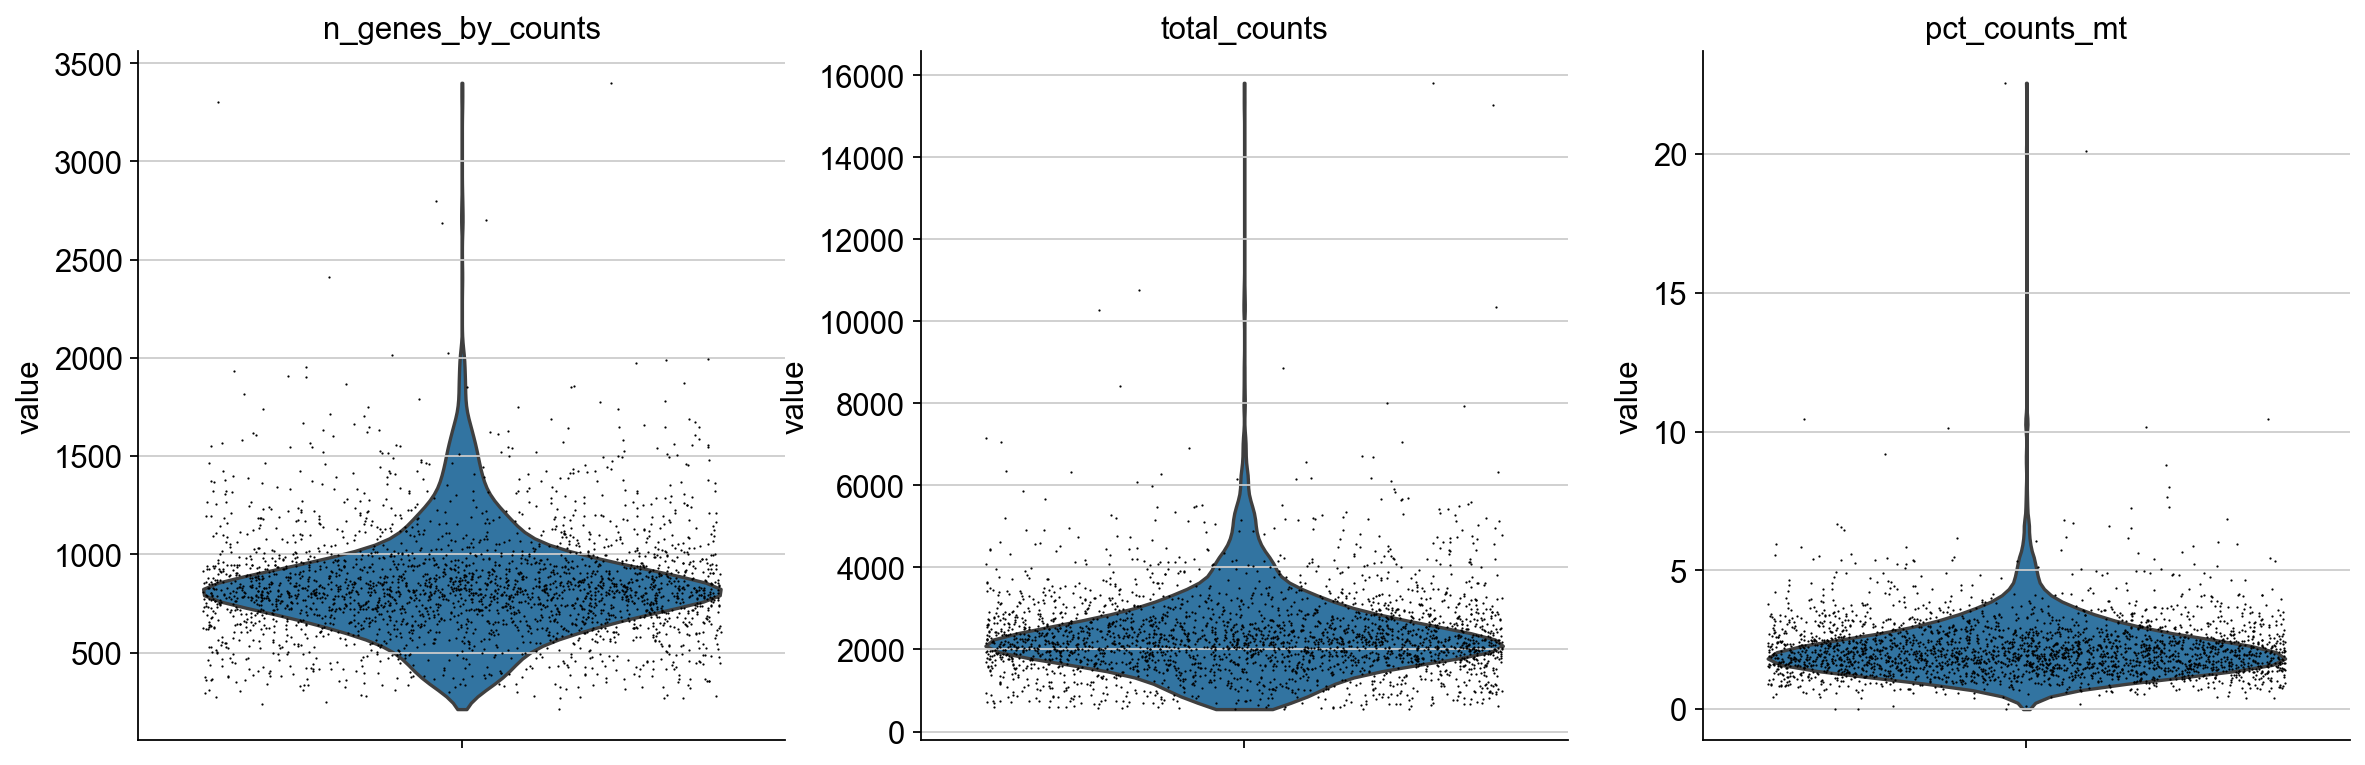

In [15]:
### plot out QC measures in violin plot..
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
            jitter = 0.4, multi_panel=True)


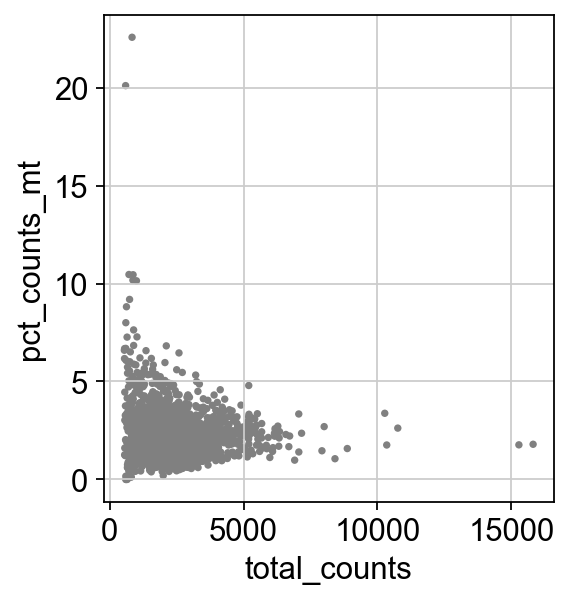

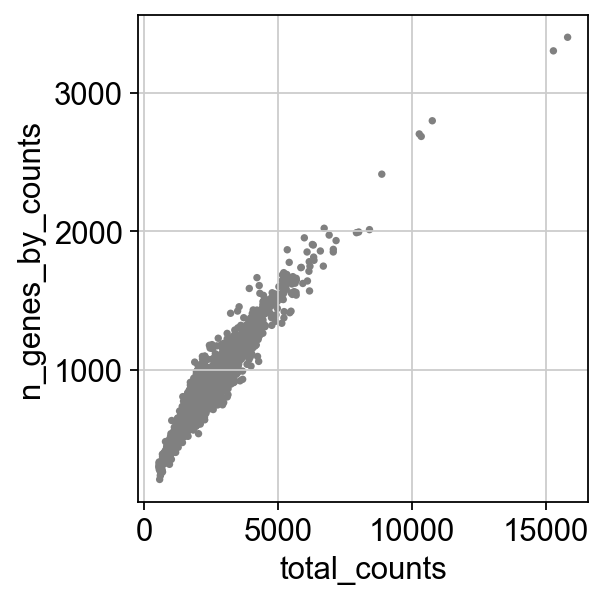

In [16]:
### remove cells with high mito content or too many total counts

# first plot how these look like... 
sc.pl.scatter(adata, x = 'total_counts', y = 'pct_counts_mt')
sc.pl.scatter(adata, x = 'total_counts', y = 'n_genes_by_counts') 
#“n_genes_by_counts”. The number of genes with at least 1 count in a cell. Calculated for all cells. So, the cells with very high total counts also has high number of genes with at least 1 count - this makes sense.


In [17]:
## now to actually filter by slicing
adata = adata[adata.obs.n_genes_by_counts < 2500, :]      #so calling out the obs level on metadata, and the n_genes_by_counts column <2500, keep every other column
adata = adata[adata.obs.pct_counts_mt <5, :]

adata    #now there are 2638 cells

View of AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

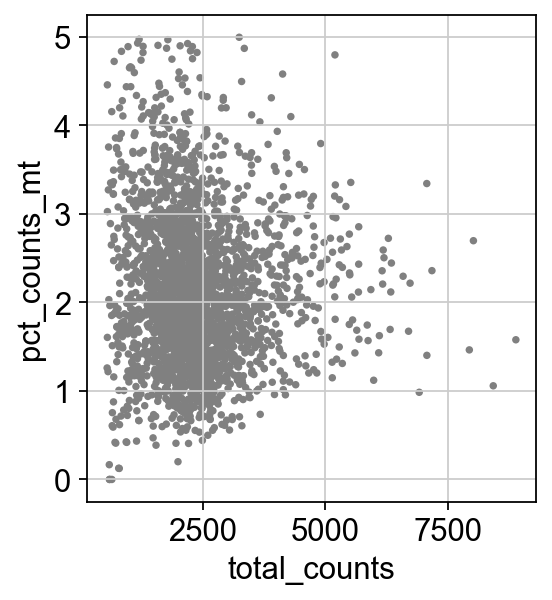

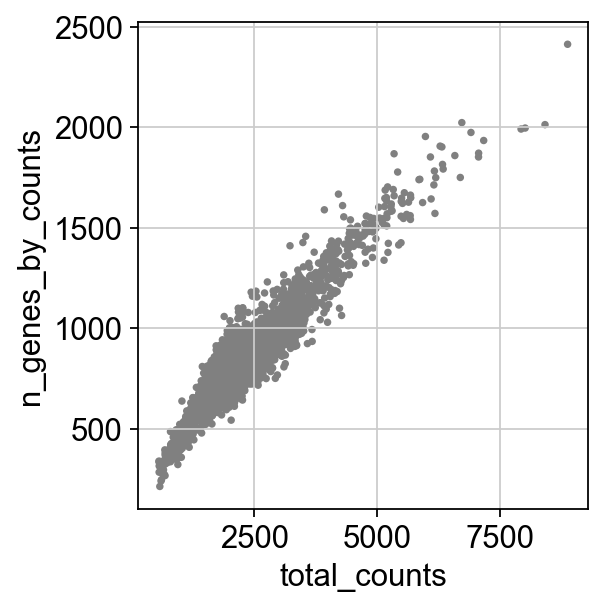

In [18]:
### you can replot scatter plot to check... 

sc.pl.scatter(adata, x = 'total_counts', y = 'pct_counts_mt')
sc.pl.scatter(adata, x = 'total_counts', y = 'n_genes_by_counts') 



#### also see: https://www.programiz.com/python-programming/shallow-deep-copy#:~:text=In%20Python%2C%20we%20use%20%3D%20operator,reference%20to%20new_list%20using%20%3D%20operator.

In [19]:
#### total counts normalise for each cell so it is 10,000 reads per cell so that counts become comparable between cells.

sc.pp.normalize_total(adata, target_sum=1e4)

adata

normalizing counts per cell
    finished (0:00:00)


/Users/uqssoon/.local/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [20]:
## log the data  --- the standard log normalisation - here this is normal log

sc.pp.log1p(adata)

In [21]:
#### iddntify HV genes
#help(sc.pp.highly_variable_genes)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [22]:
# see genes
adata.var

gene_ids  n_cells     mt  n_cells_by_counts  \
AL627309.1     ENSG00000237683        9  False                  9   
AP006222.2     ENSG00000228463        3  False                  3   
RP11-206L10.2  ENSG00000228327        5  False                  5   
RP11-206L10.9  ENSG00000237491        3  False                  3   
LINC00115      ENSG00000225880       18  False                 18   
...                        ...      ...    ...                ...   
AC145212.1     ENSG00000215750       16  False                 16   
AL592183.1     ENSG00000220023      323  False                323   
AL354822.1     ENSG00000215615        8  False                  8   
PNRC2-1        ENSG00000215700      110  False                110   
SRSF10-1       ENSG00000215699       69  False                 69   

               mean_counts  pct_dropout_by_counts  total_counts  \
AL627309.1        0.003333              99.666667           9.0   
AP006222.2        0.001111              99.888889           3.0   
RP11-206L10.2     0.001852              99.814815           5.0   
RP11-206L10.9     0.001111              99.888889           3.0   
LINC00115         0.006667              99.333333          18.0   
...                    ...                    ...           ...   
AC145212.1        0.006667              99.407407          18.0   
AL592183.1        0.134815              88.037037         364.0   
AL354822.1        0.002963              99.703704           8.0   
PNRC2-1           0.042963              95.925926         116.0   
SRSF10-1          0.025926              97.444444          70.0   

               highly_variable     means  dispersions  dispersions_norm  
AL627309.1               False  0.013556     1.432845         -0.624328  
AP006222.2               False  0.004696     1.458631         -0.573416  
RP11-206L10.2            False  0.005673     1.325459         -0.836358  
RP11-206L10.9            False  0.002644     0.859264         -1.756848  
LINC00115                False  0.027437     1.457477         -0.575693  
...                        ...       ...          ...               ...  
AC145212.1               False  0.027441     1.784637          0.070275  
AL592183.1               False  0.485051     1.859941         -0.437388  
AL354822.1               False  0.012157     1.781924          0.064919  
PNRC2-1                  False  0.160366     1.567491         -0.358474  
SRSF10-1                 False  0.100255     1.544864         -0.403150  

[13714 rows x 11 columns]

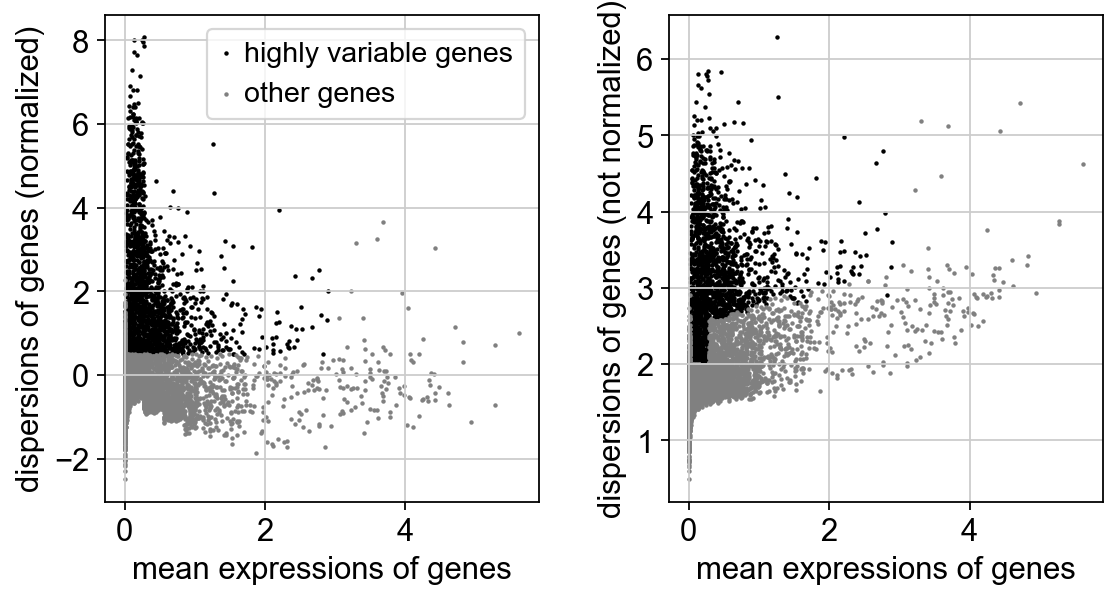

<class 'pandas.core.frame.DataFrame'>
Index: 13714 entries, AL627309.1 to SRSF10-1
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gene_ids               13714 non-null  object 
 1   n_cells                13714 non-null  int64  
 2   mt                     13714 non-null  bool   
 3   n_cells_by_counts      13714 non-null  int64  
 4   mean_counts            13714 non-null  float32
 5   pct_dropout_by_counts  13714 non-null  float64
 6   total_counts           13714 non-null  float32
 7   highly_variable        13714 non-null  bool   
 8   means                  13714 non-null  float64
 9   dispersions            13713 non-null  float64
 10  dispersions_norm       13714 non-null  float32
dtypes: bool(2), float32(3), float64(3), int64(2), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2638 entries, AAACATACAACCAC-1 to TTTGCATGCCTCAC-1
Data columns (total 5 columns

In [23]:
# plot it out
sc.pl.highly_variable_genes(adata)

### to get structure of dataframe
adata.var.info()
adata.obs.info()

### to get the number of HV genes... because the column "highly_variable" is a boolean vector - ie it gives True (1) or False (0), you can use sum function to know... 
print(adata.var.highly_variable.sum())    #1838 


In [24]:
#### now set the .raw attribute in your object as the log-transformed, normalised raw gene expression matrix for use 
# for differential testing later     ############   (still confused why we use this for DE tests)
## and visualisations     
#this practice will freeze the current state of AnnData

## you can get the AnnData of the object in .raw by calling: .raw.to_adata()


adata.raw = adata

In [25]:
print(adata)

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [26]:
### If you don’t proceed below with correcting the data with sc.pp.regress_out and scaling it via sc.pp.scale, 
#### you can also get away without using .raw at all.

#### The result of the previous highly-variable-genes detection is stored as an annotation in .var.highly_variable and 
#### auto-detected by PCA and hence, sc.pp.neighbors and subsequent manifold/graph tools. 
#### In that case, the step actually do the filtering below is unnecessary, too.


#### FILTERING.... 
adata = adata[: , adata.var.highly_variable]

adata

View of AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [27]:
######### regress out effects of total counts per cell and mito content. scale data to unit variance. 

sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])


regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:01)


In [28]:
## scale each gene to unit variance. clip values exceeding std of 10. 

sc.pp.scale(adata, max_value=10)
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [29]:
###################          PCA       ################

## uses HV genes... 
## reduce dimensionality by running PCA, which reveals the main axes of variation and denoises the data. 
# help(sc.tl.pca)
sc.tl.pca(adata, svd_solver='arpack')


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


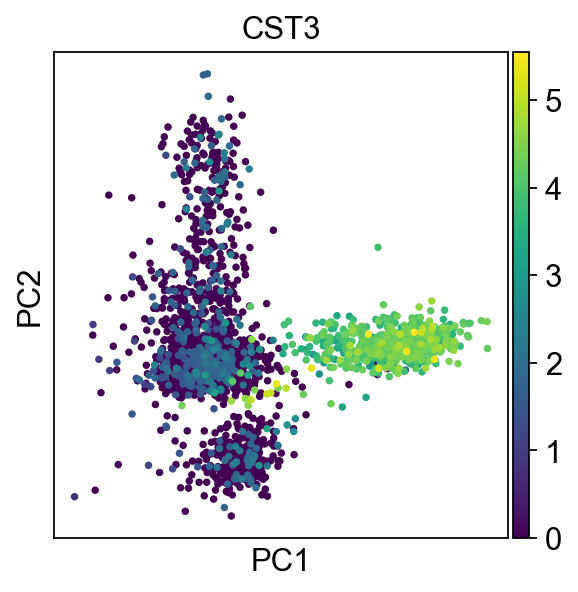

In [30]:
## plot scatter plot using PC coordinates
# and then color by a gene... 
sc.pl.pca(adata, color = 'CST3')

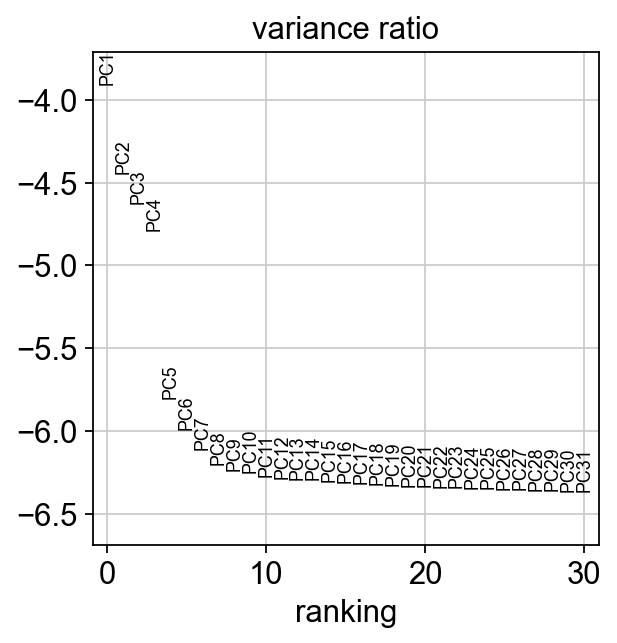

In [31]:
###E make an elbow plot- basically so we can see the contributions of each PCs to total variance.. 
# this is required for computing neighbourhood relations of cells. 
sc.pl.pca_variance_ratio(adata, log=True)

In [32]:
#### save the results... 
adata.write(results_file)

In [33]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [34]:
##################      COMPUTING NEIGHBOURHOOD GRAPH     #######################
#help(sc.pp.neighbors)
#. https://github.com/scverse/scanpy/issues/223 
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
## n_neighbor: The size of local neighborhood (in terms of number of neighboring data
#points) used for manifold approximation. Larger values result in more
#global views of the manifold, while smaller values result in more local
#data being preserved. In general values should be in the range 2 to 100.
#If `knn` is `True`, number of nearest neighbors to be searched. If `knn`
#is `False`, a Gaussian kernel width is set to the distance of the
#`n_neighbors` neighbor.
adata


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [35]:
#### embedding the neighbourhood graph in 2-D using UMAP  ####

sc.tl.umap(adata)


### troubleshooting: In some ocassions, you might still observe disconnected clusters and similar connectivity violations. 
#They can usually be remedied by running:

#sc.tl.paga(adata)
#sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
#sc.tl.umap(adata, init_pos='paga')
### PAGA: graph abstraction reconciles clustering with trajectory inference through a topology preserving map of single cells

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


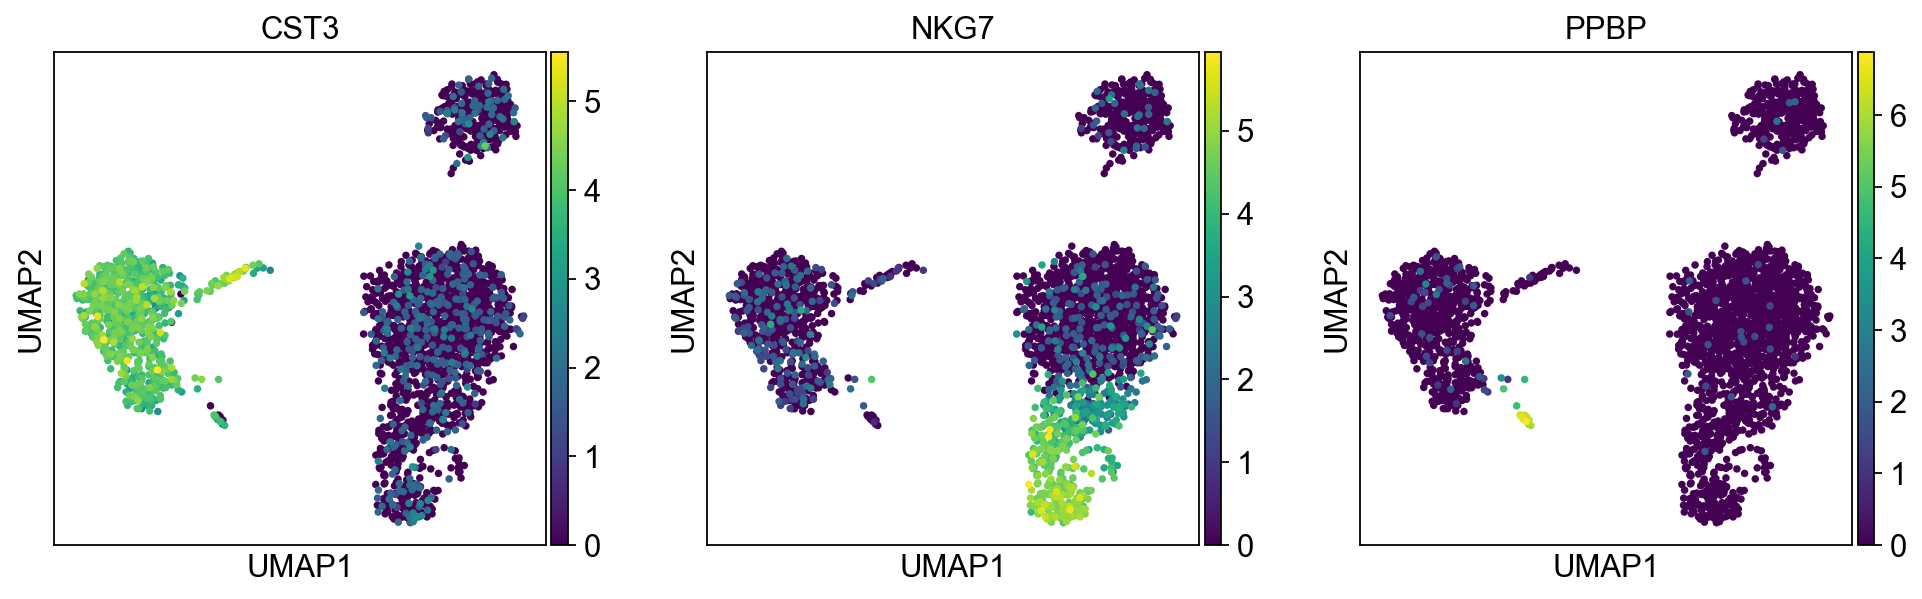

In [36]:
## plot it out

sc.pl.umap(adata, color = ['CST3', 'NKG7', 'PPBP'])


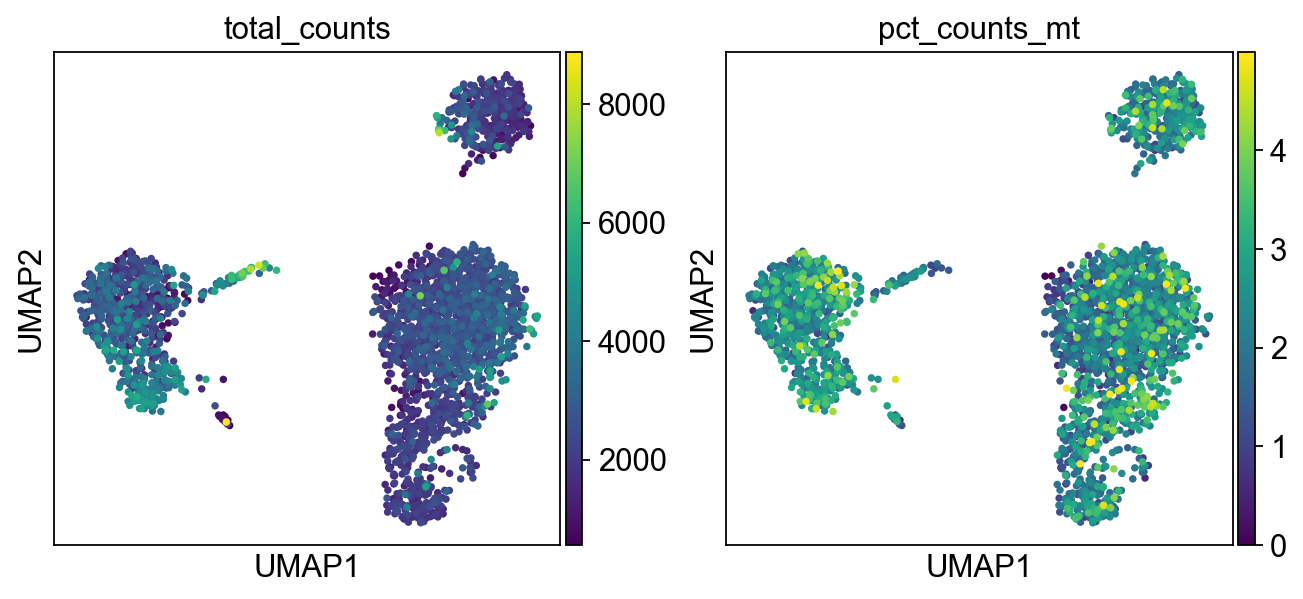

In [37]:
#help(sc.pl.umap)
adata.obs

## plot some QC variables... 
sc.pl.umap(adata, color = ['total_counts', 'pct_counts_mt'])

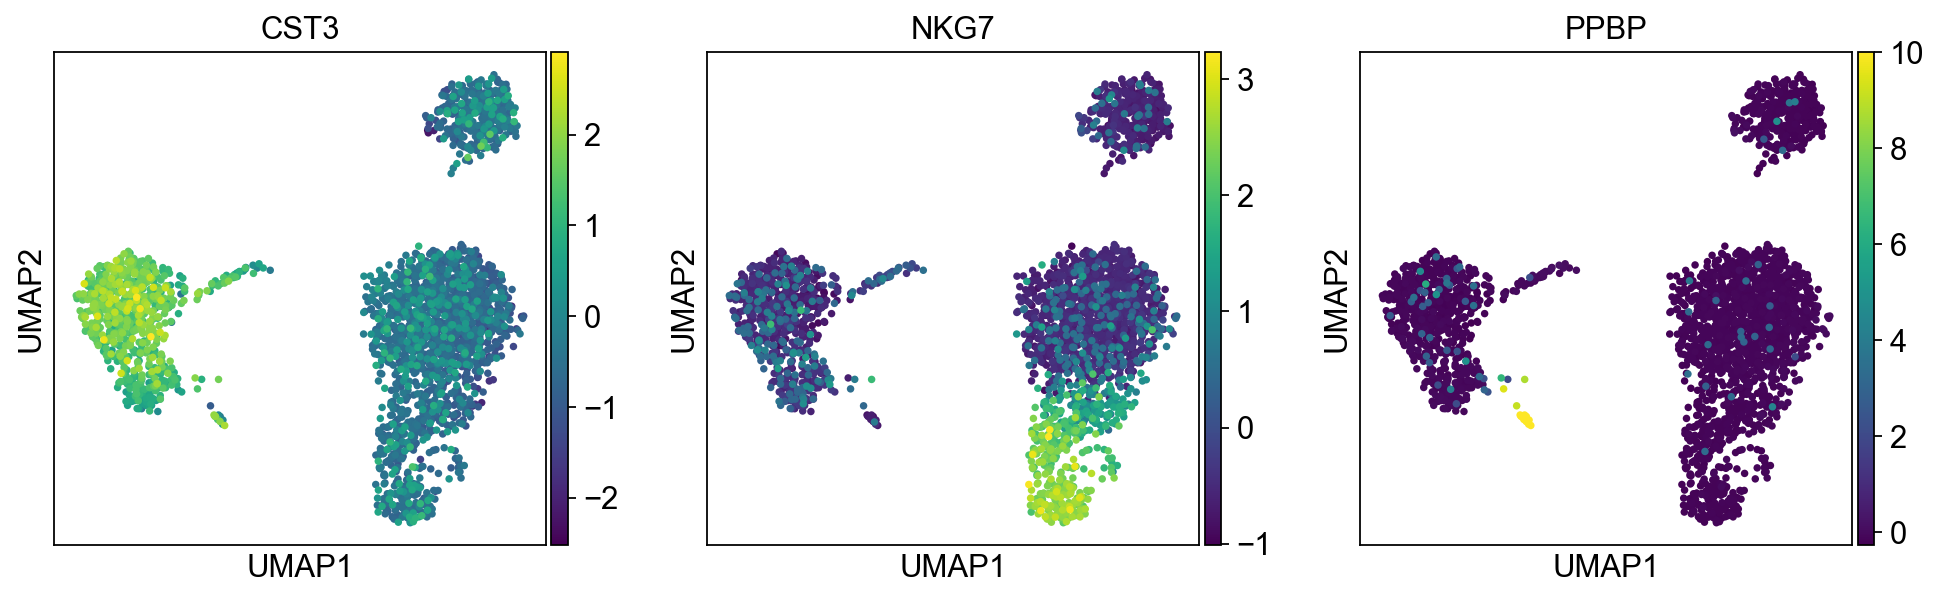

In [39]:
# because we have set so adata.raw contains the log-transformed, normalised, but uncorrected matrix, by default
#this is what pl.umap will use. If you want to plot the scaled and corrected gene expression matrix, use use_raw=False

sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False) ###you can see the scale has changed... 

In [40]:
############### Clustering the neighbourhood graph ##################

#help(sc.tl.leiden)

sc.tl.leiden(adata)

##### you can also play around with resolution of clustering: 
#sc.tl.leiden(adata, resolution =0.2)


running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/uqssoon/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


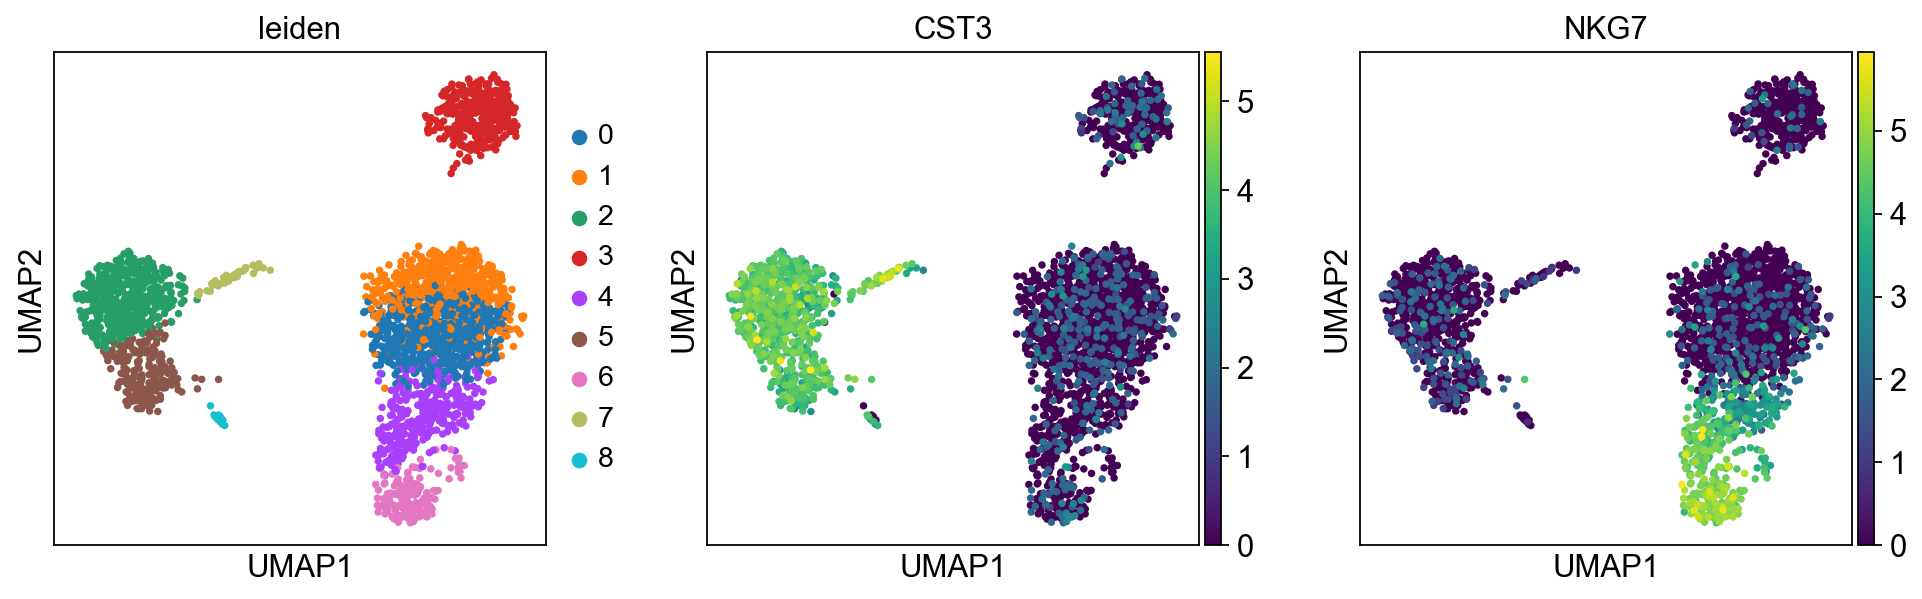

In [41]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

In [42]:
#### now save results

adata.write(results_file)

In [43]:

adata
# you can't really deal with data in .uns 

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [44]:
adata.obs.leiden
## to get number of cells per cluster..
adata.obs.groupby(["leiden"]).apply(len)

leiden
0    639
1    506
2    436
3    341
4    307
5    201
6    159
7     36
8     13
dtype: int64

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


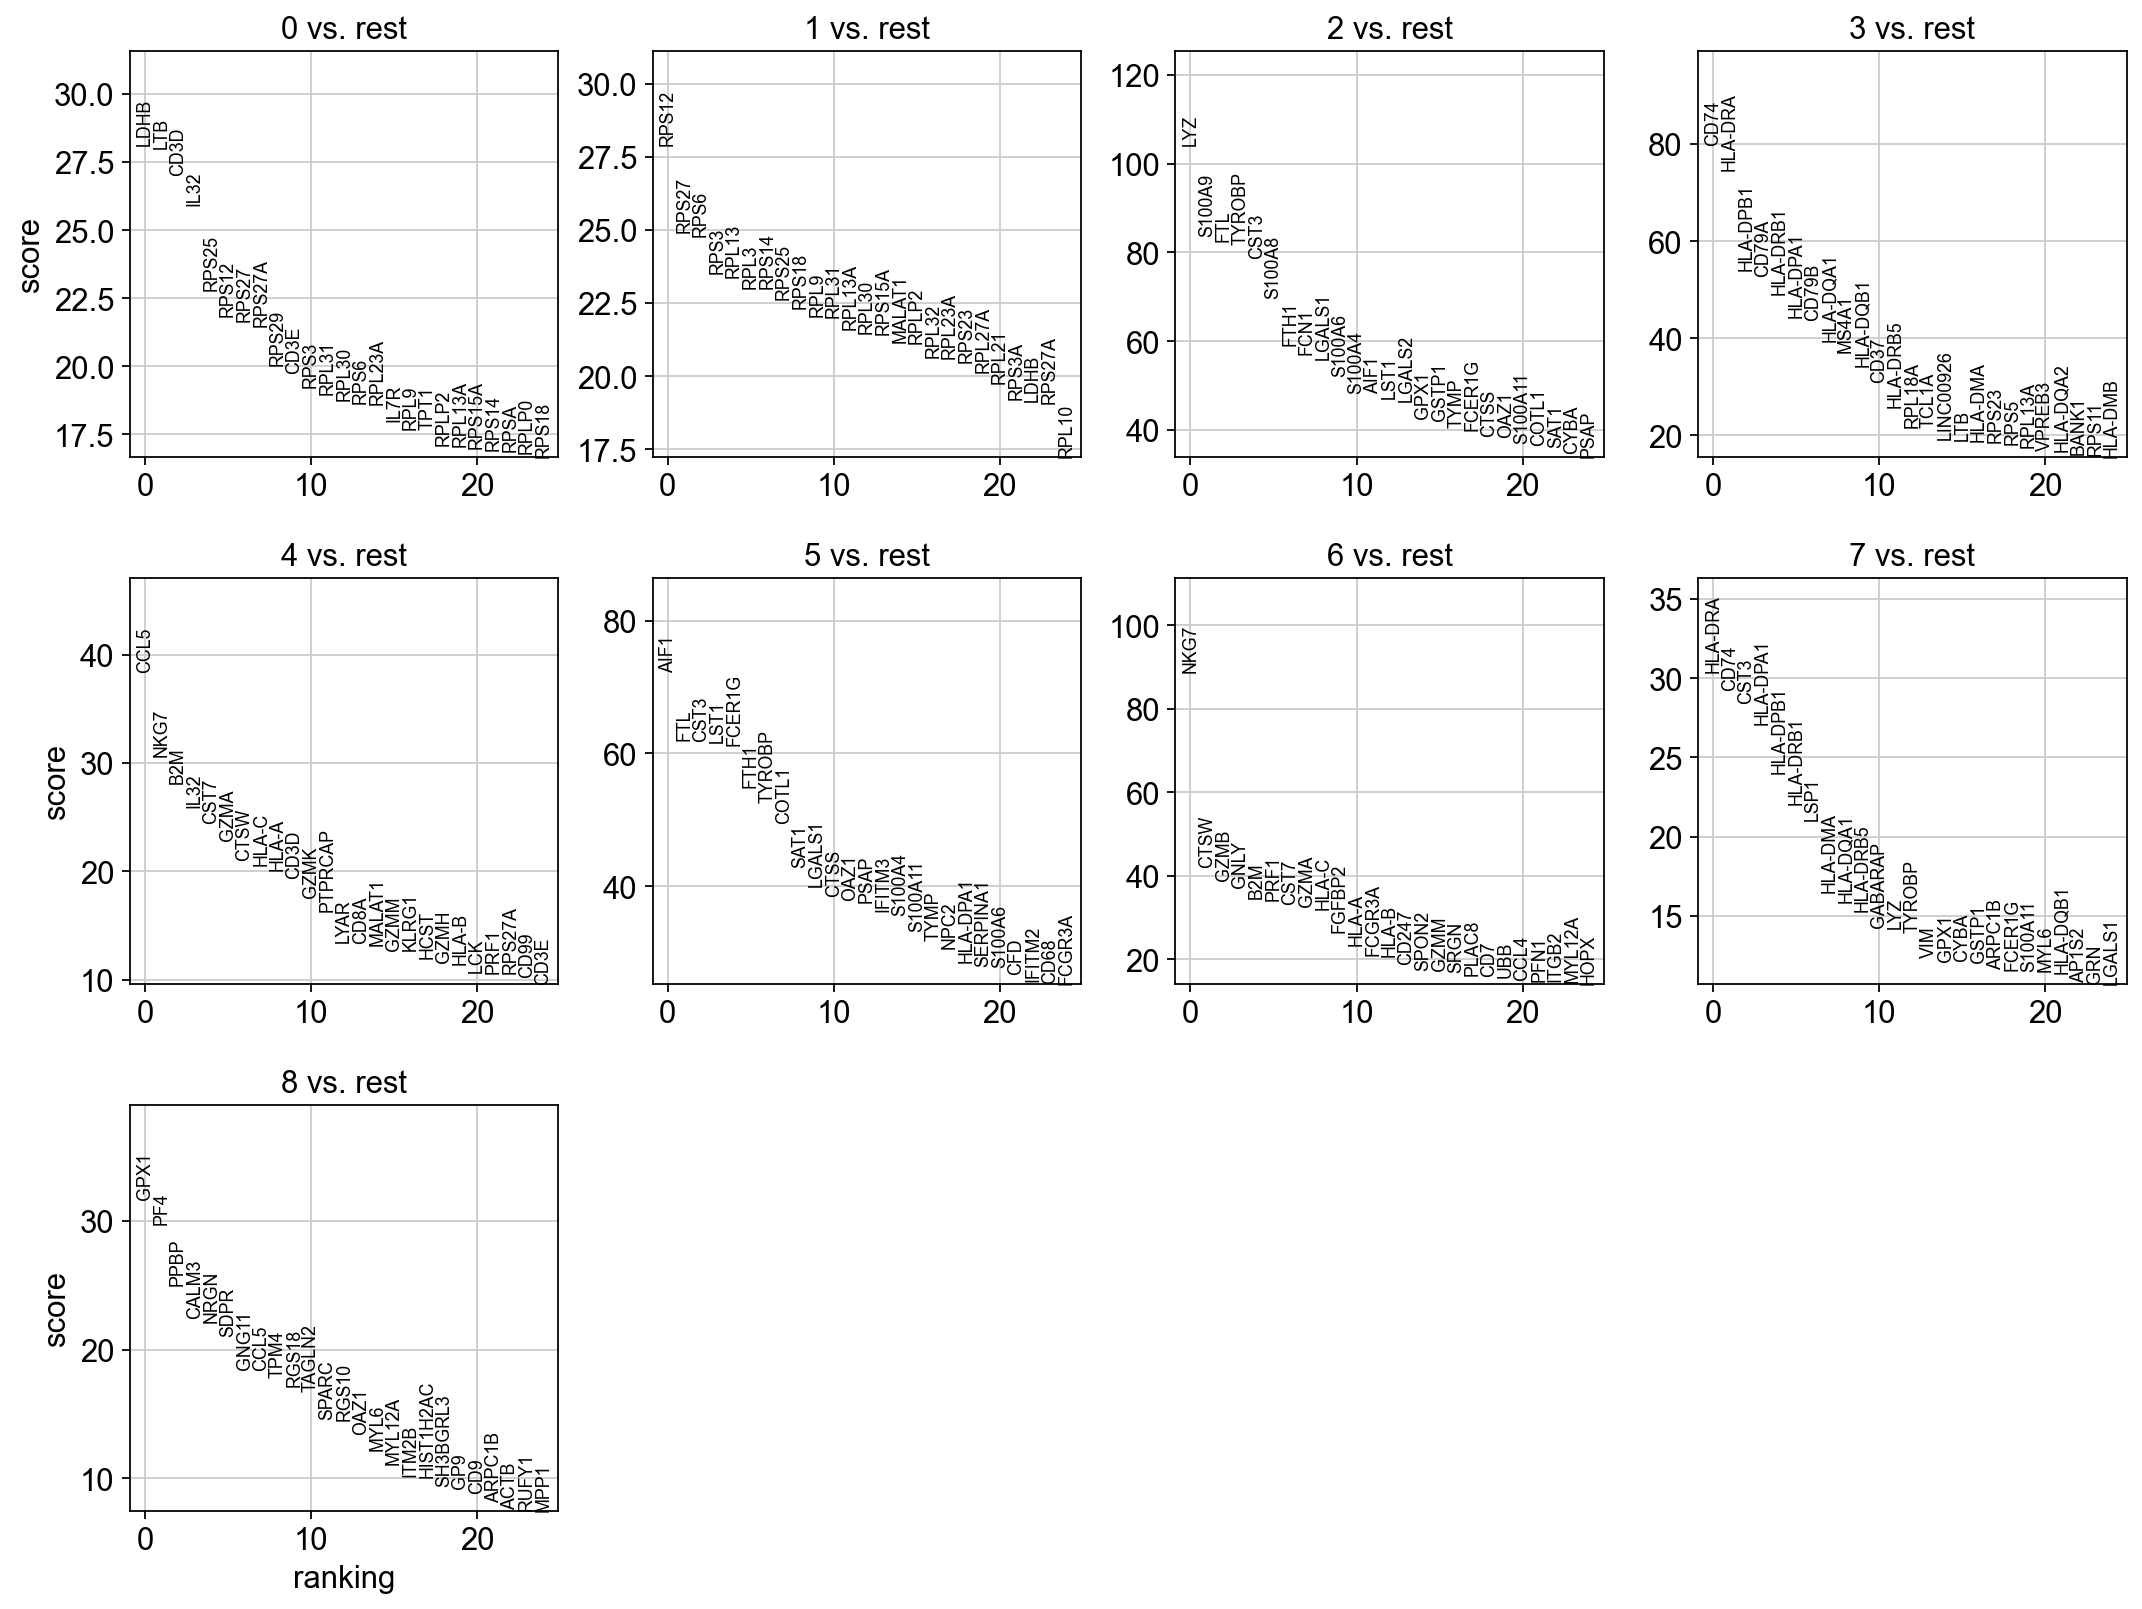

In [45]:
#############         Finding marker genes    ###########

## compute a ranking for highly differential genes in each cluster. 
# by default .raw (log-transformed, normalised but uncorrected) is used in case it has been initialized before. 
# simplest and fastest method is t-test


sc.tl.rank_genes_groups(adata, 'leiden', method = 't-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False) #sharey means each panel 

In [46]:
sc.settings.verbosity=2 #reduce verbosity

In [47]:
# save the result

adata.write(results_file)

ranking genes
    finished (0:00:02)


/usr/local/anaconda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


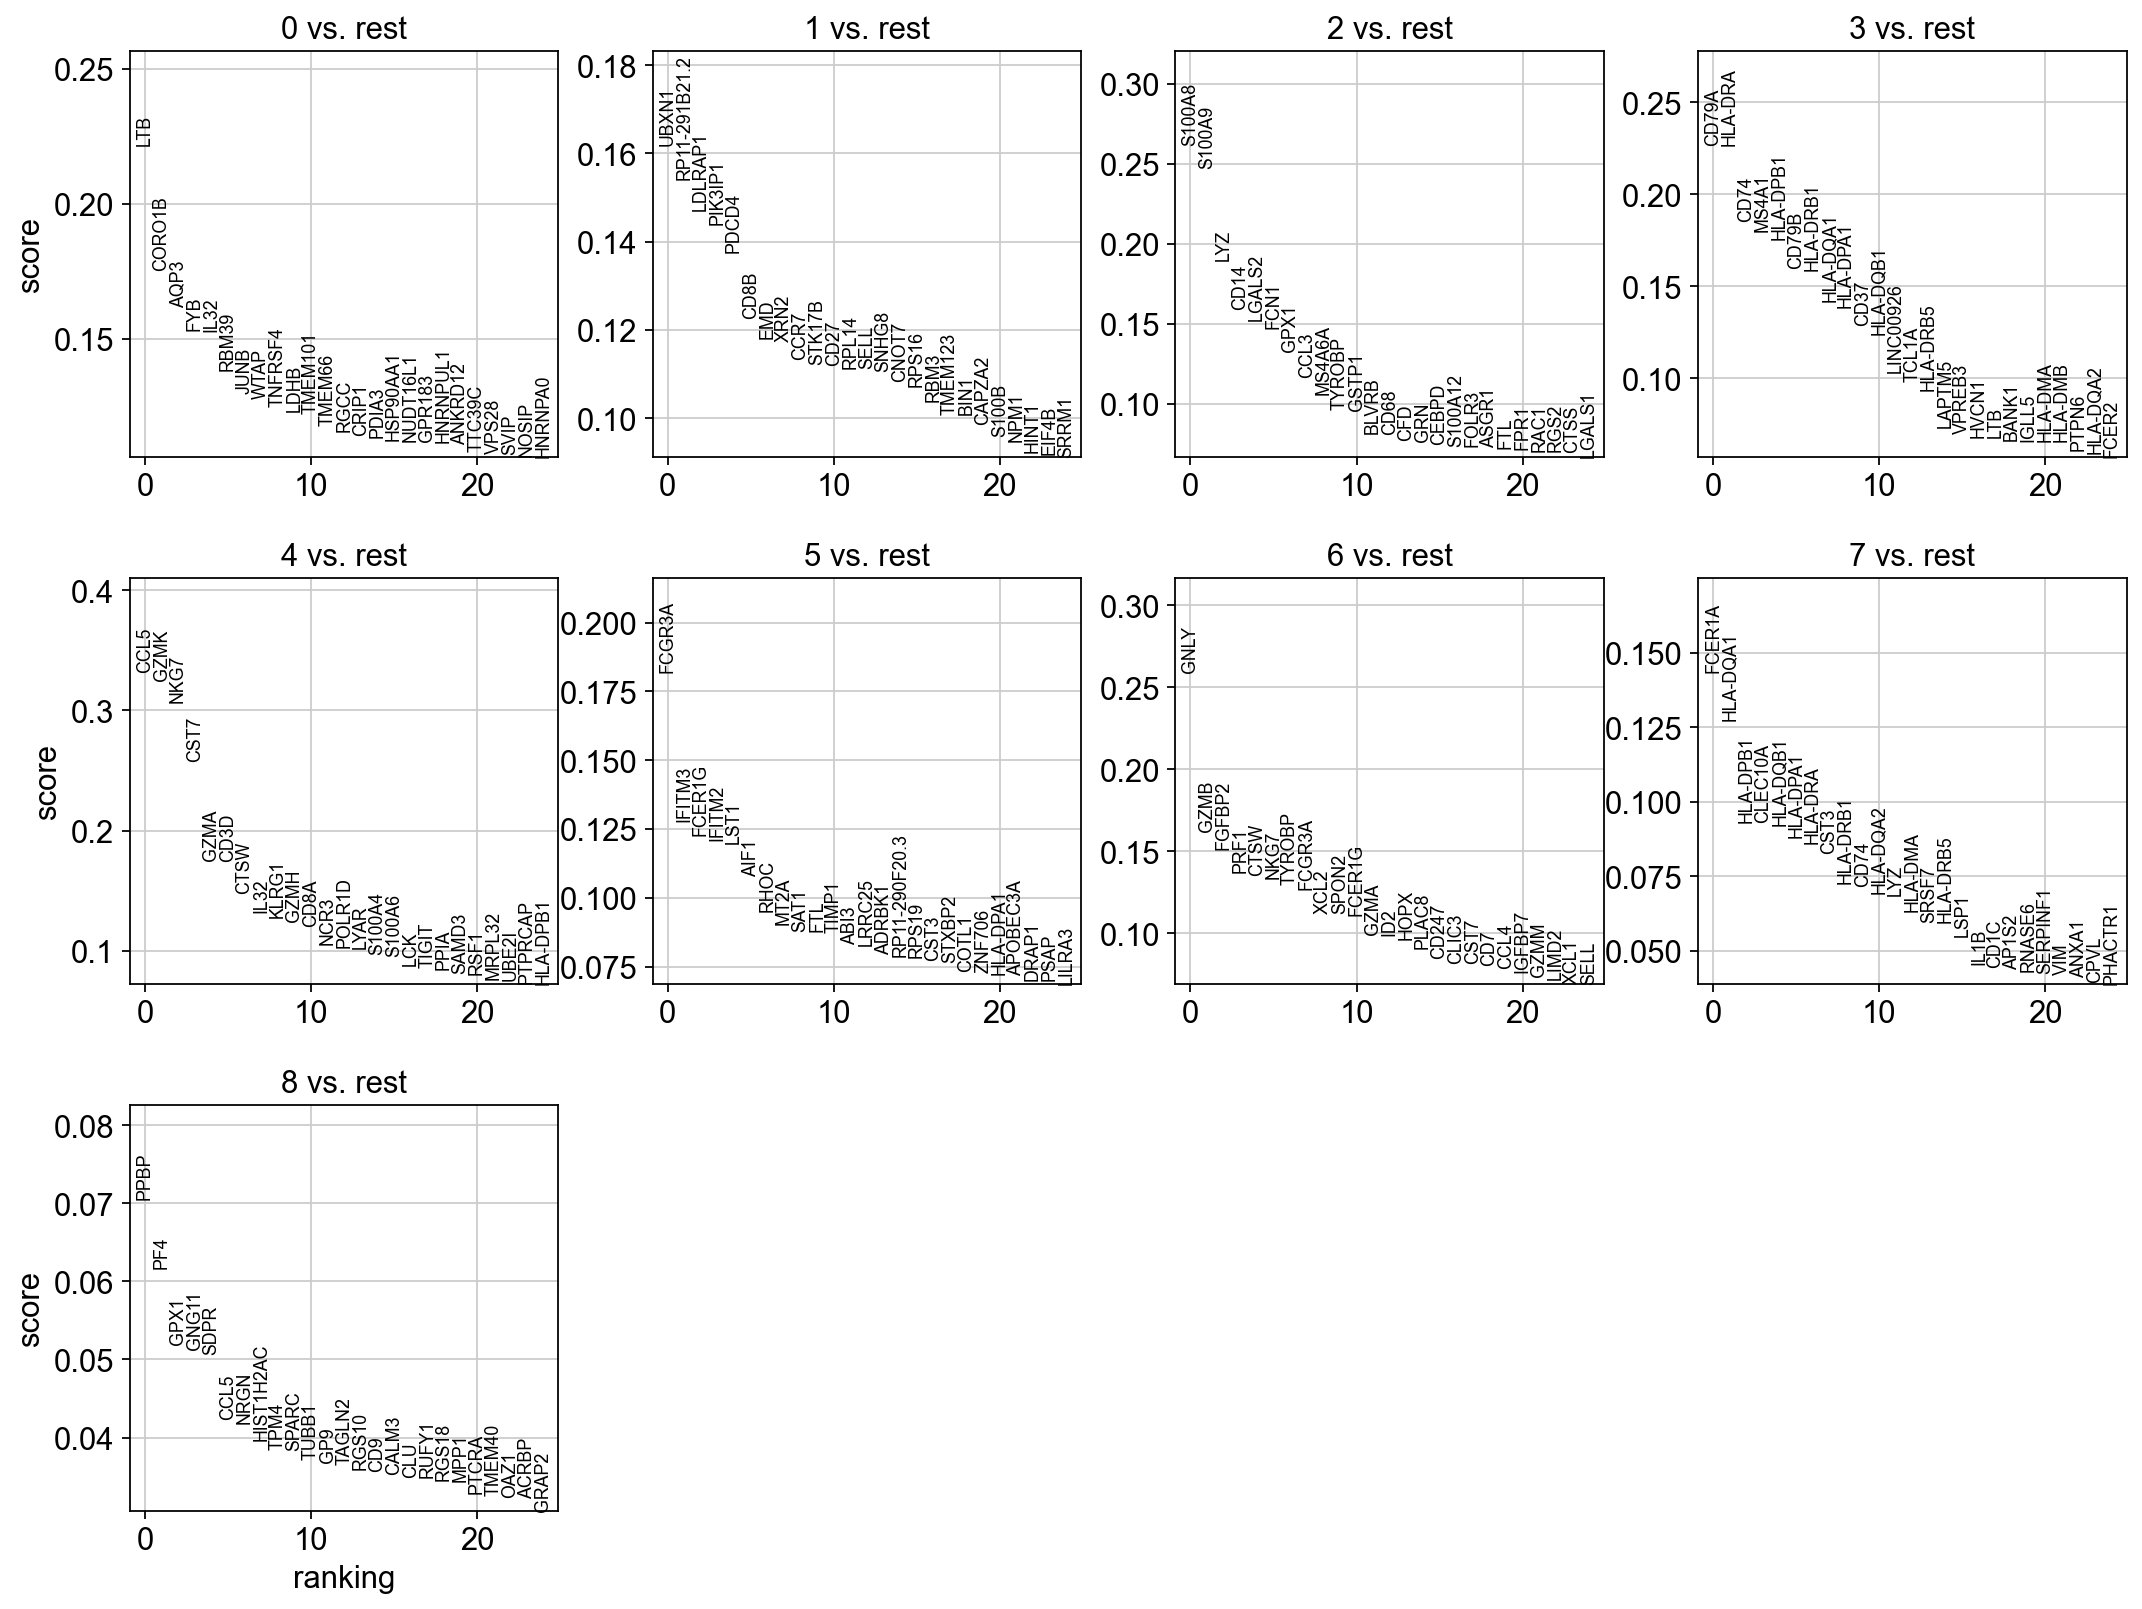

In [57]:
########### alternatively.... let us rank genes using logistic regression as suggested by Natranos et al. 2018
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')   #by default - reference is all cells
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [48]:
############ now let's define a list of marker genes used for later as well... 

marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [49]:
### reload the object that has the wilcox test saved. 

adata = sc.read(results_file)

In [50]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [51]:
#### show the top 5 ranked genes for each cluster as a dataframe - but this data frame would have all
# constructing df using output of rank_genes_groups, but only getting the gene ids... 
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)     #names = numpy array containing gene ids

# https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.rank_genes_groups.html  -- the 'names' is part of the output. 

0      1       2         3     4       5     6         7      8
0   LDHB  RPS12     LYZ      CD74  CCL5    AIF1  NKG7   HLA-DRA   GPX1
1    LTB  RPS27  S100A9   HLA-DRA  NKG7     FTL  CTSW      CD74    PF4
2   CD3D   RPS6     FTL  HLA-DPB1   B2M    CST3  GZMB      CST3   PPBP
3   IL32   RPS3  TYROBP     CD79A  IL32    LST1  GNLY  HLA-DPA1  CALM3
4  RPS25  RPL13    CST3  HLA-DRB1  CST7  FCER1G   B2M  HLA-DPB1   NRGN

In [54]:
########   get a table with the scores and the groups
# adata.uns_keys()    --- to get the "keys" of adata.uns
# first creata a dataset using all output of rank_gene_groups
result = adata.uns['rank_genes_groups']    
### This line retrieves the result of the rank_genes_groups analysis stored in the adata.uns dictionary.  The rank_genes_groups result should contain information about differentially expressed genes between different cell groups.
# to check data structure
print(type(result))   #dictionary in this case
print(result.keys())
result 


<class 'dict'>
dict_keys(['logfoldchanges', 'names', 'params', 'pvals', 'pvals_adj', 'scores'])


{'logfoldchanges': array([( 1.9939286,  0.8470455 ,  6.1781235,  4.0795345,  5.2209926,  4.8923893,   6.8688717,   4.6085496,   6.478824),
        ( 2.2403085,  0.8127385 ,  7.3717427,  4.8870344,  4.8397756,  3.2521725,   4.807891 ,   3.6391494,  12.905741),
        ( 2.2694104,  0.71990836,  3.383326 ,  4.0658145,  0.7933935,  4.7151313,   7.6950693,   4.9127884,  13.035219),
        ...,
        (-3.534969 , -3.3408294 , -4.4654775, -3.9112678, -3.2317615, -3.999441 ,  -3.6260133, -28.427946 , -30.860151),
        (-4.1015067, -4.277187  , -1.6028749, -4.344168 , -4.27781  , -3.921001 ,  -5.726039 , -29.275715 , -30.812096),
        (-3.5211692, -4.1110525 , -4.786811 , -4.7835937, -6.4857264, -4.812126 , -28.577654 , -28.9233   , -31.603243)],
       dtype=[('0', '<f4'), ('1', '<f4'), ('2', '<f4'), ('3', '<f4'), ('4', '<f4'), ('5', '<f4'), ('6', '<f4'), ('7', '<f4'), ('8', '<f4')]),
 'names': array([('LDHB', 'RPS12', 'LYZ', 'CD74', 'CCL5', 'AIF1', 'NKG7', 'HLA-DRA', 'GPX1'),
      

In [55]:
# then create another dataset
### names is a numpy array of gene ids stored within output of rank_genes_groups - array is group vs group, and gene ids stored in it. 
groups = result['names'].dtype.names   #### dtype.names - gets the names out as a tuple...   
# This line extracts the names of the groups from the result dictionary. It assumes that the result['names'] is a structured NumPy array with named columns (dtype), where each column corresponds to a different group. The dtype.names attribute retrieves the names of these columns as a tuple of strings, representing the group names.
print(type(groups)) #tuple
groups

<class 'tuple'>


('0', '1', '2', '3', '4', '5', '6', '7', '8')

In [68]:
################ FULL CODE FOR MAKING THE TABLE OF DEG GENES    ############


################     now make another df containing a dictionary..      #################
#### new key here is: group + '_' + key[:1]  = for every group in groups, ie '0' + _ + 1st letter of "names" and "pvals"
#### value here is: result from "result" for either 'names' ie genes, or p-values from 'pvals' ... 

# Let's break down the dictionary comprehension:

#The outer loop for group in groups iterates over each group name extracted in the previous step.
#The inner loop for key in ['names', 'pvals'] iterates over the two keys: 'names' and 'pvals'.
#For each combination of group and key, the dictionary comprehension creates a key-value pair in the format group_key, where group is the name of the group, and key[:1] takes the first character of the key (e.g., 'n' from 'names', 'p' from 'pvals'). This is done to differentiate the columns when combining them into the DataFrame.

#The dictionary comprehension in the code uses result[key][group] to extract information from the result dictionary. Let's break down what result[key][group] means:
#key: In the context of the dictionary comprehension, key represents either 'names' or 'pvals'. These are the keys in the `result` dictionary that store information about the differentially expressed gene names and p-values, respectively.
#group: `group`` is the name of a specific group or cluster of cells for which we want to extract the information. The `groups` variable stores the names of all the groups in the `result`` dictionary. So, during each iteration of the comprehension, group takes one of these names.

#Here's what the comprehension is doing for each group and key:
#When group is a specific group name (e.g., 'GroupA') and key is 'names', it extracts the differentially expressed gene names for that group using result['names']['GroupA'].
#When group is a specific group name (e.g., 'GroupB') and key is 'pvals', it extracts the p-values for that group using result['pvals']['GroupB'].
#So, the dictionary comprehension combines the differentially expressed gene names and p-values for each group and creates a dictionary with keys like 'GroupA_n', 'GroupA_p', 'GroupB_n', and 'GroupB_p'. The values are the corresponding differentially expressed gene names and p-values for each group.


result = adata.uns['rank_genes_groups'] 
groups = result['names'].dtype.names     #specify the group names you are interested in a variable called "groups"
pd.DataFrame(                  
    {group + '_' + key[:1]: result[key][group]  
     for group in groups for key in ['names', 'pvals']}).head(5)


#result = adata.uns['rank_genes_groups'] 
#clusters = ('0')
#pd.DataFrame(                  
#    {group + '_' + key[:1]: result[key][group]  
#     for group in clusters for key in ['names', 'pvals']}).head(5)

0_n            0_p    1_n            1_p     2_n  2_p       3_n  \
0   LDHB  3.297031e-142  RPS12  5.259824e-141     LYZ  0.0      CD74   
1    LTB  1.181274e-142  RPS27  2.161688e-114  S100A9  0.0   HLA-DRA   
2   CD3D  9.801679e-132   RPS6  3.239237e-113     FTL  0.0  HLA-DPB1   
3   IL32  3.452656e-122   RPS3  7.879685e-103  TYROBP  0.0     CD79A   
4  RPS25  9.211557e-104  RPL13  1.261550e-102    CST3  0.0  HLA-DRB1   

             3_p   4_n            4_p     5_n            5_p   6_n  \
0   0.000000e+00  CCL5  4.174345e-134    AIF1  1.419827e-295  NKG7   
1   0.000000e+00  NKG7  2.207135e-104     FTL  5.844083e-270  CTSW   
2  2.257043e-272   B2M  1.916735e-109    CST3  2.666330e-286  GZMB   
3  1.606498e-169  IL32   7.127842e-95    LST1  9.768240e-195  GNLY   
4  2.278958e-243  CST7   1.097648e-77  FCER1G  1.159043e-211   B2M   

             6_p       7_n           7_p    8_n           8_p  
0  7.576799e-232   HLA-DRA  6.560267e-32   GPX1  1.326433e-13  
1  5.115624e-100      CD74  2.552722e-31    PF4  1.251720e-12  
2   1.239979e-84      CST3  2.601737e-29   PPBP  9.925949e-12  
3   3.677969e-82  HLA-DPA1  4.913539e-28  CALM3  1.688225e-11  
4   1.012128e-96  HLA-DPB1  2.866570e-25   NRGN  4.092874e-11

ranking genes


/Users/uqssoon/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


    finished (0:00:00)


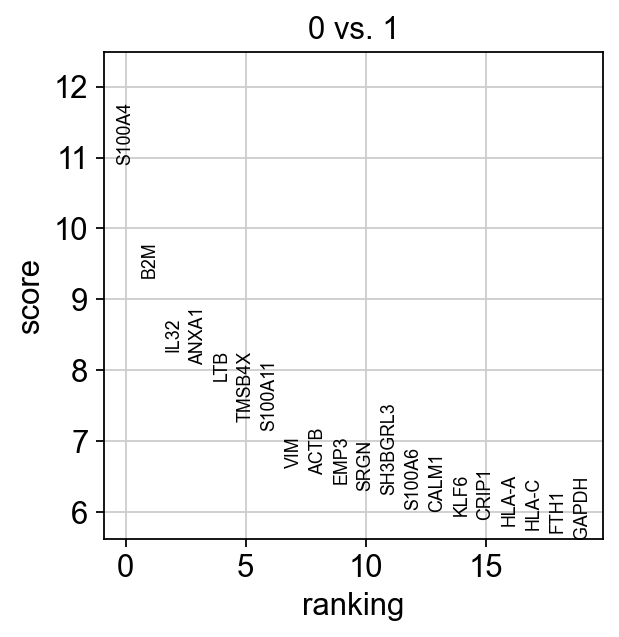

In [69]:
############## do marker genes against 1 specific cluster     ############
sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)


/usr/local/anaconda/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


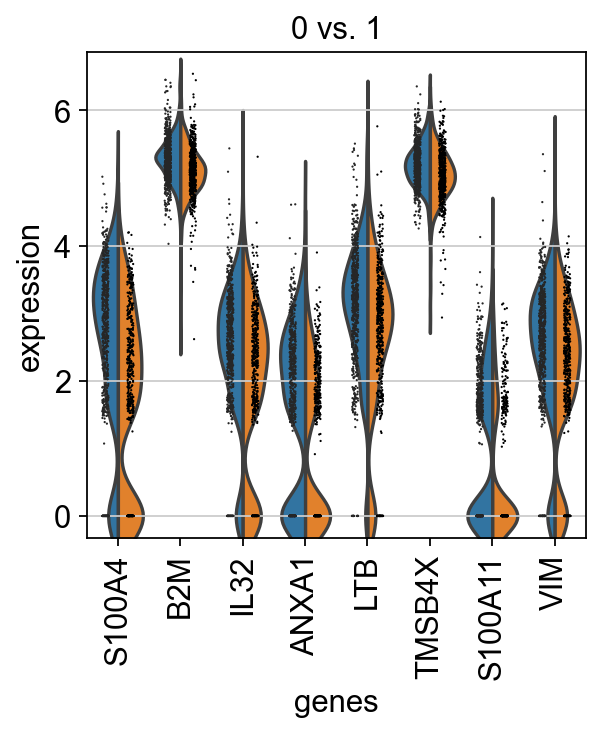

In [71]:
#### you can plot these genes differently.... 

sc.pl.rank_genes_groups_violin(adata, groups=['0'], n_genes=8)


In [72]:
### reload object with original DE test - ie against rest of clusters

adata = sc.read(results_file)

/usr/local/anaconda/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


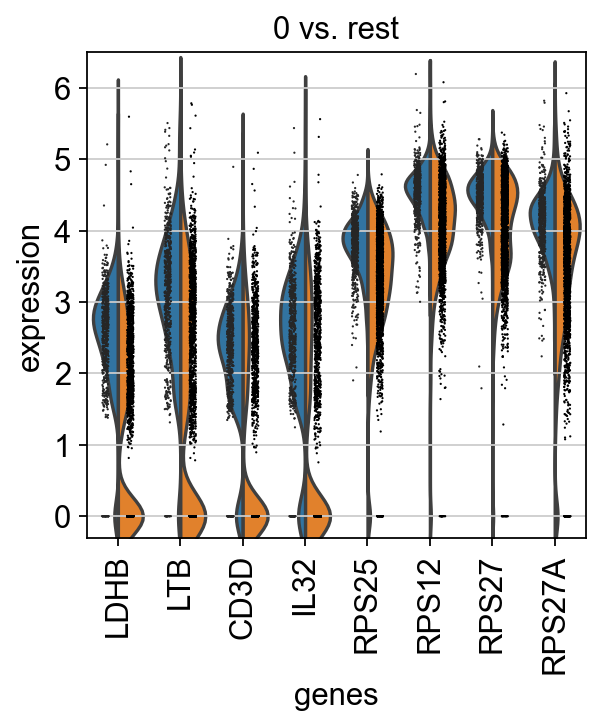

In [73]:
## replot
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

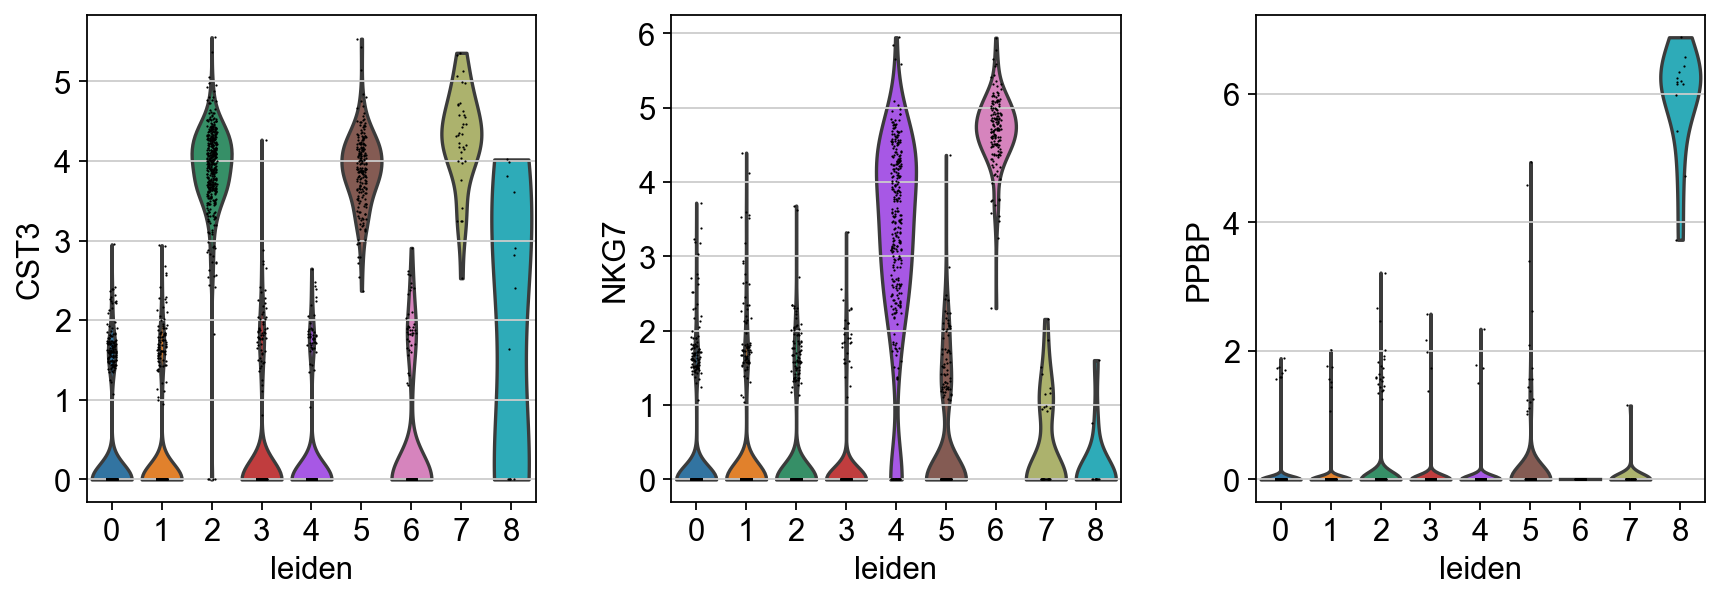

In [75]:
########## to compare a certain gene across all groups... 
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')



In [76]:

#### REASSIGN NEW CLUSTER NAMES
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes', 'New'
]
adata.rename_categories('leiden', new_cluster_names)

/Users/uqssoon/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


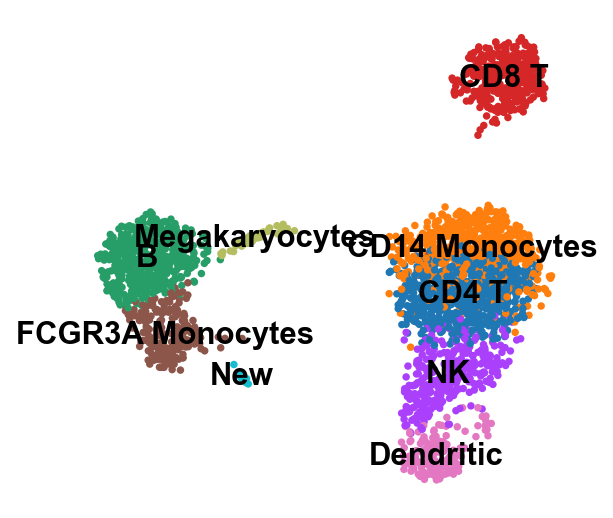

In [78]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

/Users/uqssoon/.local/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


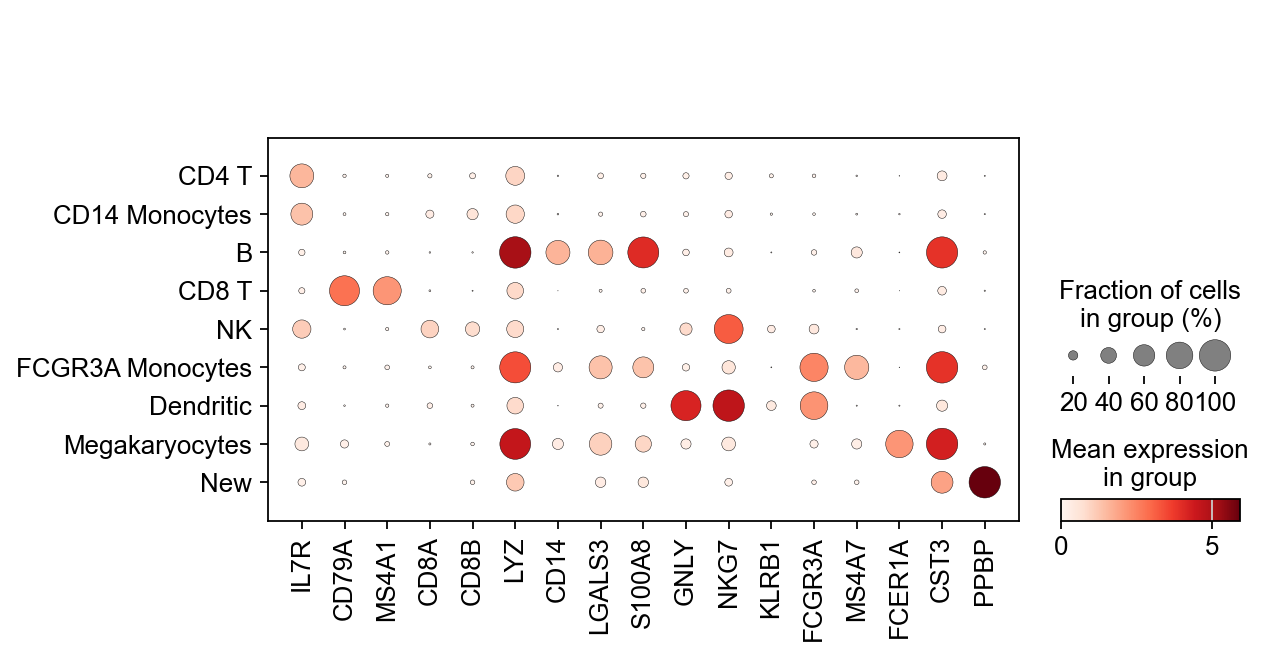

In [79]:
### visualise marker genes... 
sc.pl.dotplot(adata, marker_genes, groupby='leiden')

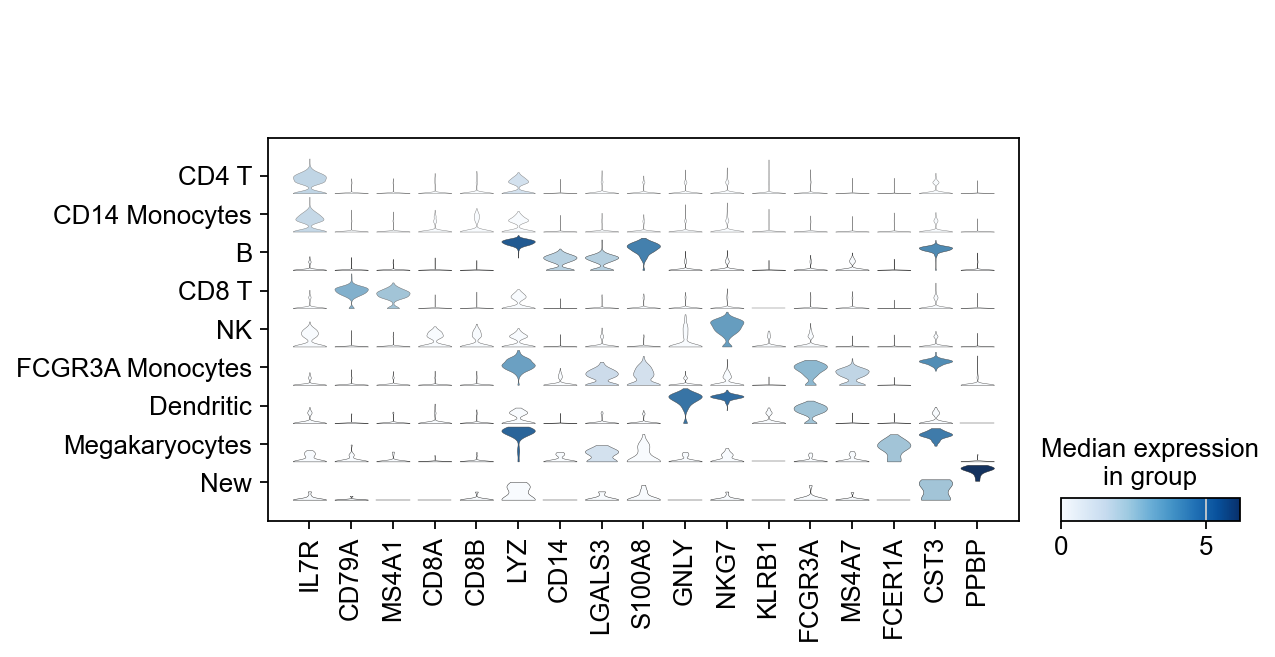

In [80]:
## do compact violin plots... 
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

In [81]:
#### during this analysis, anndata accumulated more annotations: 
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [82]:
####### write out file - 

adata.write(results_file, compression='gzip')    # `compression='gzip'` saves disk space, but slows down writing and subsequent reading

In [83]:
######  you can remove the dense scaled and corrected data matrix if you want to share a smaller object, where they simply need the transformed matrix.. for visualisation. This will still be contained in .raw

adata.raw.to_adata().write('./write/pbmc3k_withoutX.h5ad')

In [ ]:
########## To export to csv, you can try: 

# Export single fields of the annotation of observations
# adata.obs[['n_counts', 'louvain_groups']].to_csv(
#     './write/pbmc3k_corrected_louvain_groups.csv')

# Export single columns of the multidimensional annotation
# adata.obsm.to_df()[['X_pca1', 'X_pca2']].to_csv(
#     './write/pbmc3k_corrected_X_pca.csv')

# Or export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
# adata.write_csvs(results_file[:-5], )